### Structural Breaks

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf

from FinancialMachineLearning.regime_change.supremum_adf import *
from FinancialMachineLearning.regime_change.cusum_test import *
from FinancialMachineLearning.regime_change.chow_type import *

In [3]:
start_date = '1962-01-01'
end_date = '2024-01-29'
ticker = 'IBM'
data = yf.download(ticker, start = start_date, end = end_date)
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,7.374124,7.374124,7.291268,7.291268,1.555767,407940
1962-01-03,7.291268,7.355003,7.291268,7.355003,1.569366,305955
1962-01-04,7.355003,7.355003,7.278521,7.281708,1.553727,274575
1962-01-05,7.272148,7.272148,7.125558,7.138305,1.523128,384405
1962-01-08,7.131931,7.131931,6.947100,7.004461,1.494568,572685
...,...,...,...,...,...,...
2024-01-22,172.820007,174.449997,172.399994,172.830002,172.830002,4926000
2024-01-23,172.899994,174.020004,172.479996,173.940002,173.940002,3983500
2024-01-24,174.759995,174.860001,172.899994,173.929993,173.929993,9097800


#### CUSUM Test

<Axes: xlabel='Date'>

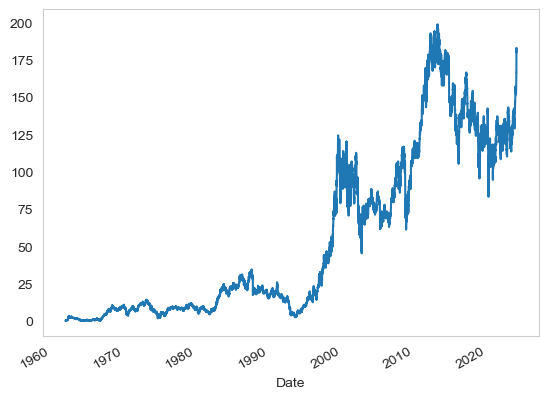

In [17]:
get_values_diff(
    test_type = 'two_sided',
    series = data['Close'],
    index = data.index,
    ind = data.index[0]
).plot(grid = False)

In [24]:
chu_stinchcombe = get_chu_stinchcombe_white_statistics(
    series = np.log(data['Close']), 
    test_type = 'two_sided',
    num_threads = 8
)

2024-01-29 02:26:27.144070 100.0% get_s_n_for_t done after 6.58 minutes. Remaining 0.0 minutes.


<Axes: title={'center': 'Chu-Stinchcombe White Statistics'}, xlabel='Date'>

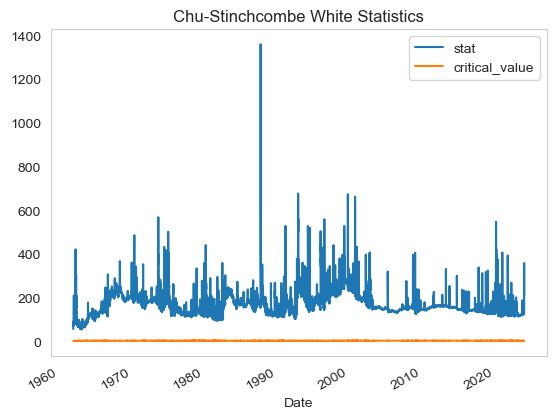

In [37]:
import matplotlib.pyplot as plt

chu_stinchcombe.plot(grid = False, title = 'Chu-Stinchcombe White Statistics')

#### Explosiveness Test

In [38]:
chow = chow_type_stat(
    series = np.log(data['Close']), 
    min_length = 20, 
    num_threads = 8
)

2024-01-29 02:34:14.131901 100.0% chow_type_adf done after 3.18 minutes. Remaining 0.0 minutes.


<Axes: title={'center': 'Chow Type Dickey Fuller Statistics'}, xlabel='Date'>

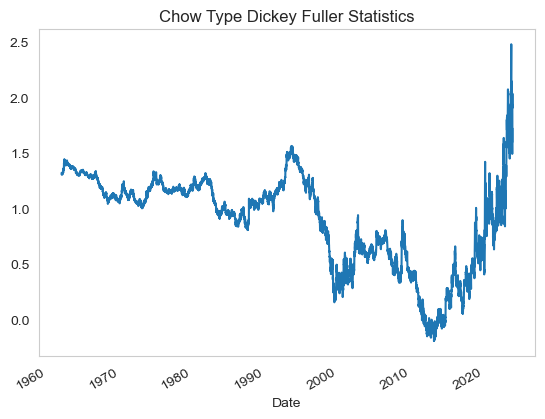

In [41]:
chow.plot(grid = False, title = 'Chow Type Dickey Fuller Statistics')

In [ ]:
sadf = get_sadf(
    series = np.log(data['Close']), 
    model = 'linear', 
    lags = 3, 
    min_length = 100, 
    add_const = True,
    num_threads = 8
)